In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from Algorithms import AdaBoost, SVM, NonlinearSVM, Logistic, k_fold_cross_validation, sampling
from utils import cllassification_report, plot_matrix, confusion_matrix, plot_roc_curve

titanic_data = pd.read_csv('train.csv')

## Preprocessing


In [49]:
label_encoder = LabelEncoder()

titanic_data.fillna(titanic_data.median(numeric_only=True), inplace=True)

titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(
    titanic_data['Embarked'])
titanic_data['Pclass'] = label_encoder.fit_transform(titanic_data['Pclass'])


X = titanic_data.drop(
    columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
y = titanic_data['Survived']

## Scaling Dataset


In [50]:
X_selected = titanic_data[['Pclass', 'Sex', 'Parch', 'Embarked', 'SibSp']]

In [51]:
X_sampled, y_sampled = sampling(X_selected, y)

In [52]:
scaler = StandardScaler()
scaler.fit(X_sampled)
X_sampled = scaler.transform(X_sampled)
y_sampled = y_sampled.to_numpy()

## Splitting Dataset to Train and Test


In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=22)

print(X_selected.shape, X_train.shape, X_test.shape)

(891, 5) (712, 5) (179, 5)


## Linear SVM Model

### Using Cross validation


In [54]:
svm_model = SVM()

scores = k_fold_cross_validation(svm_model, X_train, y_train, k=5)

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.76760563 0.6971831  0.75352113 0.75352113 0.83098592]
Mean Accuracy: 0.7605633802816902
Standard Deviation: 0.042720425036910155


In [55]:
y_test_pred = svm_model.predict(X_test)

print(cllassification_report(y_test, y_test_pred))

Label      Precision    Recall  F1-score   Support
--------------------------------------------------
0               0.74      0.80      0.77        90
1               0.81      0.76      0.78        89
--------------------------------------------------
Accuracy                                      0.78
Support                                        179



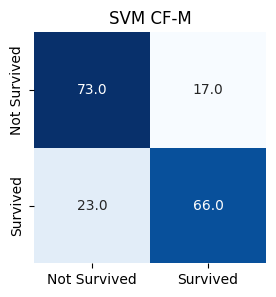

In [56]:
cf = confusion_matrix(y_test, y_test_pred)

plot_matrix(cf, 'SVM')

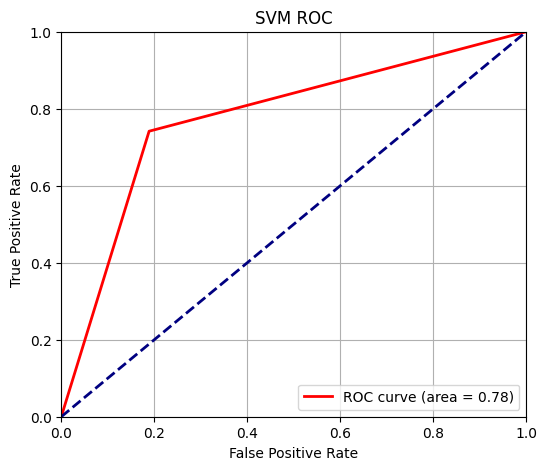

In [57]:
plot_roc_curve(y_test, y_test_pred, 'SVM')

## Non-Linear SVM Model

### Using Cross validation


In [58]:
non_svm_model = NonlinearSVM()

scores = k_fold_cross_validation(non_svm_model, X_train, y_train, k=5)

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.64084507 0.67605634 0.72535211 0.73239437 0.72535211]
Mean Accuracy: 0.7
Standard Deviation: 0.03579792965391221


In [59]:
y_test_pred = non_svm_model.predict(X_test)

print(cllassification_report(y_test, y_test_pred))

Label      Precision    Recall  F1-score   Support
--------------------------------------------------
0               0.54      0.79      0.64        90
1               0.86      0.65      0.74        89
--------------------------------------------------
Accuracy                                      0.70
Support                                        179



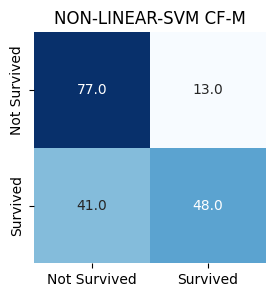

In [60]:
cf = confusion_matrix(y_test, y_test_pred)

plot_matrix(cf, 'NON-LINEAR-SVM')

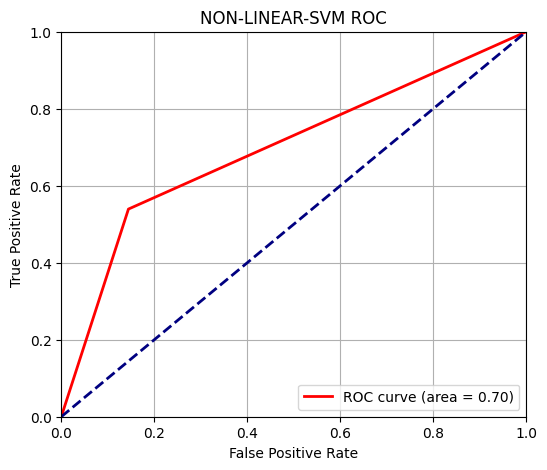

In [61]:
plot_roc_curve(y_test, y_test_pred, 'NON-LINEAR-SVM')

## Logistic Regression Model

### Using Cross validation


In [62]:
log_model = Logistic()

scores = k_fold_cross_validation(log_model, X_train, y_train, k=5)

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.76056338 0.77464789 0.75352113 0.76056338 0.72535211]
Mean Accuracy: 0.7549295774647887
Standard Deviation: 0.01630399563773269


In [63]:
y_test_pred = log_model.predict(X_test)

print(cllassification_report(y_test, y_test_pred))

Label      Precision    Recall  F1-score   Support
--------------------------------------------------
0               0.76      0.80      0.78        90
1               0.81      0.78      0.79        89
--------------------------------------------------
Accuracy                                      0.79
Support                                        179



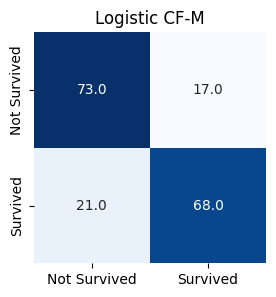

In [64]:
cf = confusion_matrix(y_test, y_test_pred)
plot_matrix(cf, 'Logistic')

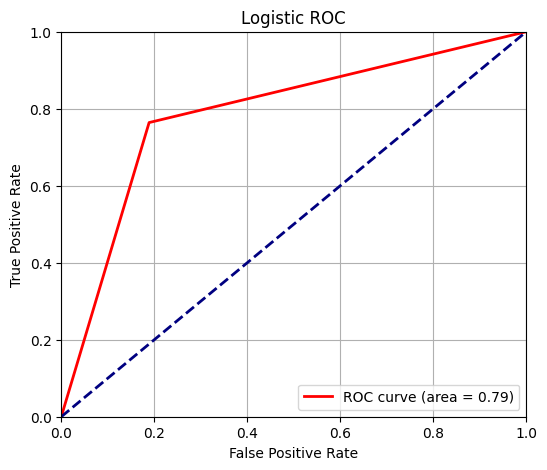

In [65]:
plot_roc_curve(y_test, y_test_pred, 'Logistic')

## AdaBoost Model

### Using Cross validation


In [66]:
ada_model = AdaBoost()

scores = k_fold_cross_validation(ada_model, X_train, y_train, k=5)

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.75352113 0.65492958 0.6971831  0.75352113 0.71126761]
Mean Accuracy: 0.7140845070422535
Standard Deviation: 0.03715748157259977


In [67]:
y_test_pred = ada_model.predict(X_test)

print(cllassification_report(y_test, y_test_pred))

Label      Precision    Recall  F1-score   Support
--------------------------------------------------
0               0.85      0.63      0.73        90
1               0.51      0.78      0.62        89
--------------------------------------------------
Accuracy                                      0.68
Support                                        179



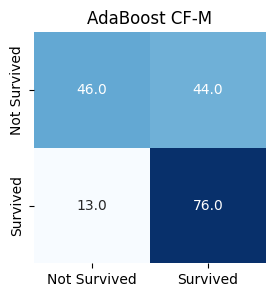

In [68]:
cf = confusion_matrix(y_test, y_test_pred)
plot_matrix(cf, 'AdaBoost')

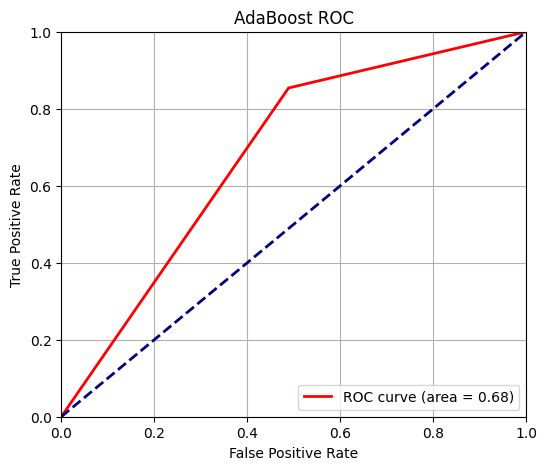

In [69]:
plot_roc_curve(y_test, y_test_pred, 'AdaBoost')